# The Sparks Foundation
## **Graduate Rotational Internship Program**

## Task 1 - Prediction using Decision Tree Algorithm
 To train the Decision Tree classifier to predict the proper class on the Iris dataset of flowers with three classes 

### *Author - Ashwath Baskar

In [1]:
# Importing libraries in Python to read,analysed and visualized the dataset

import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Forming the iris dataframe

df=pd.read_csv('Iris.csv') 

#### DataSet Information 

In [2]:
#Basic Information regarding data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
#For each numeric feature, the Describe function returns the basic numerical information about the data. 

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#For each class label, the data points count value.

df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The Iris data is deemed to be a balanced dataset because each class has an equal amount of data points. In the sample, no Class has a complete dominance. 

#### Visualizing Iris Data

We used Matplotlib or seaborn as a Python library to visualise the data.


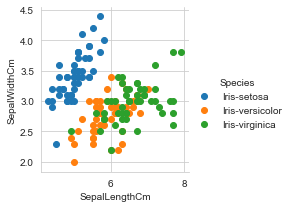

In [6]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

Looking at the Scatter plot, we can see that all blue points (Iris-setosa) are perfectly separated from orange (versicolor) or green (virginica) points for characteristics (SepalLengthCm, SepalwidthCm) 

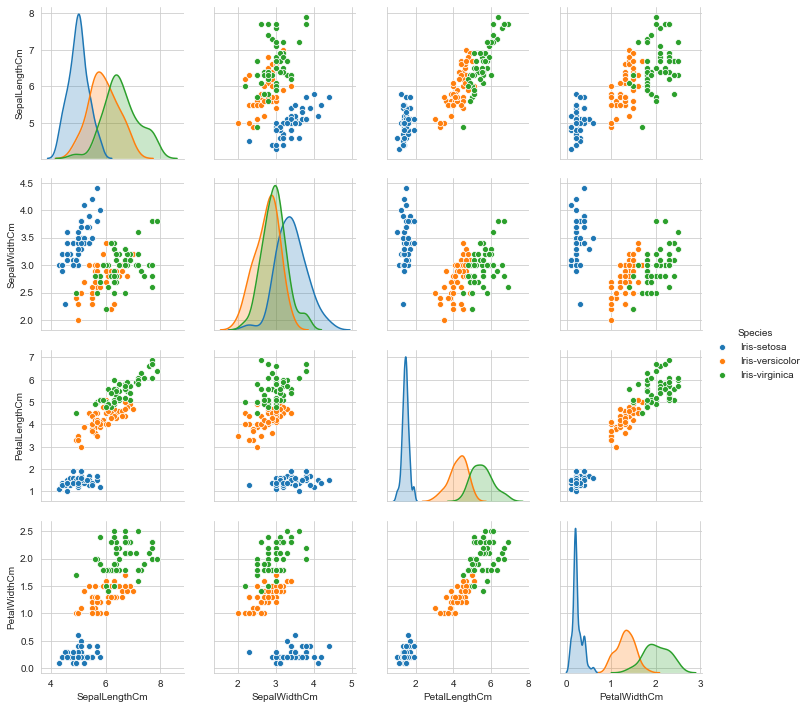

In [7]:
#Pair plot gives the relationship b/w all features distribution with each other.

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

In the pair plot, we can see that several feature combinations have very little overlap between Versicolor and Verginica, indicating that those features are particularly significant for our classification task. 

In [8]:
#Droping Id column as it is of no use in classifing the class labels..

df.drop(['Id'],axis=1,inplace=True)

-Using the difference between each feature to train the dataset more precisely. 

In [9]:
# To create a Sepal and Petal difference between their length and Breadth

df['Sepal_diff'] = df['SepalLengthCm']-df['SepalWidthCm']
df['petal_diff'] = df['PetalLengthCm']-df['PetalWidthCm']

# Difference between the Length and Breadth of Sepal and Petal

df['Sepal_petal_len_diff'] = df['SepalLengthCm']-df['PetalLengthCm']
df['Sepal_petal_width_diff'] = df['SepalWidthCm']-df['PetalWidthCm']

# Difference between Sepal length and Petal width, as well as Sepal width and Petal length 

df['Sepal_petal_len_wid_diff'] = df['SepalLengthCm']-df['PetalWidthCm']
df['Sepal_petal_wid_len_diff'] = df['SepalWidthCm']-df['PetalLengthCm']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


#### Now let us define the Decision Tree Algorithm

In [10]:
# Defining the decision tree algorithm

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
# In this section, we separate independent variables from target variables in the Iris dataset. 


X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = df['Species']


# Prior to training the model, we separated our data into Actual Train and Actual Test Datasets for training and validation. 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=14)

# Data split into validation train and validation test 

Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=14)


# We've now developed a Decision tree classifier and trained it on a training dataset. 


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Let us visualize the Decision Tree to understand it better.

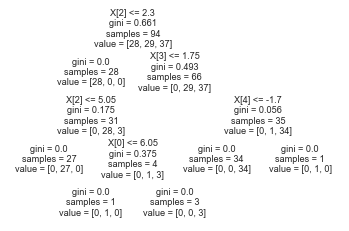

In [12]:
# Import necessary libraries for graph viz

from sklearn import tree
import graphviz

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf);



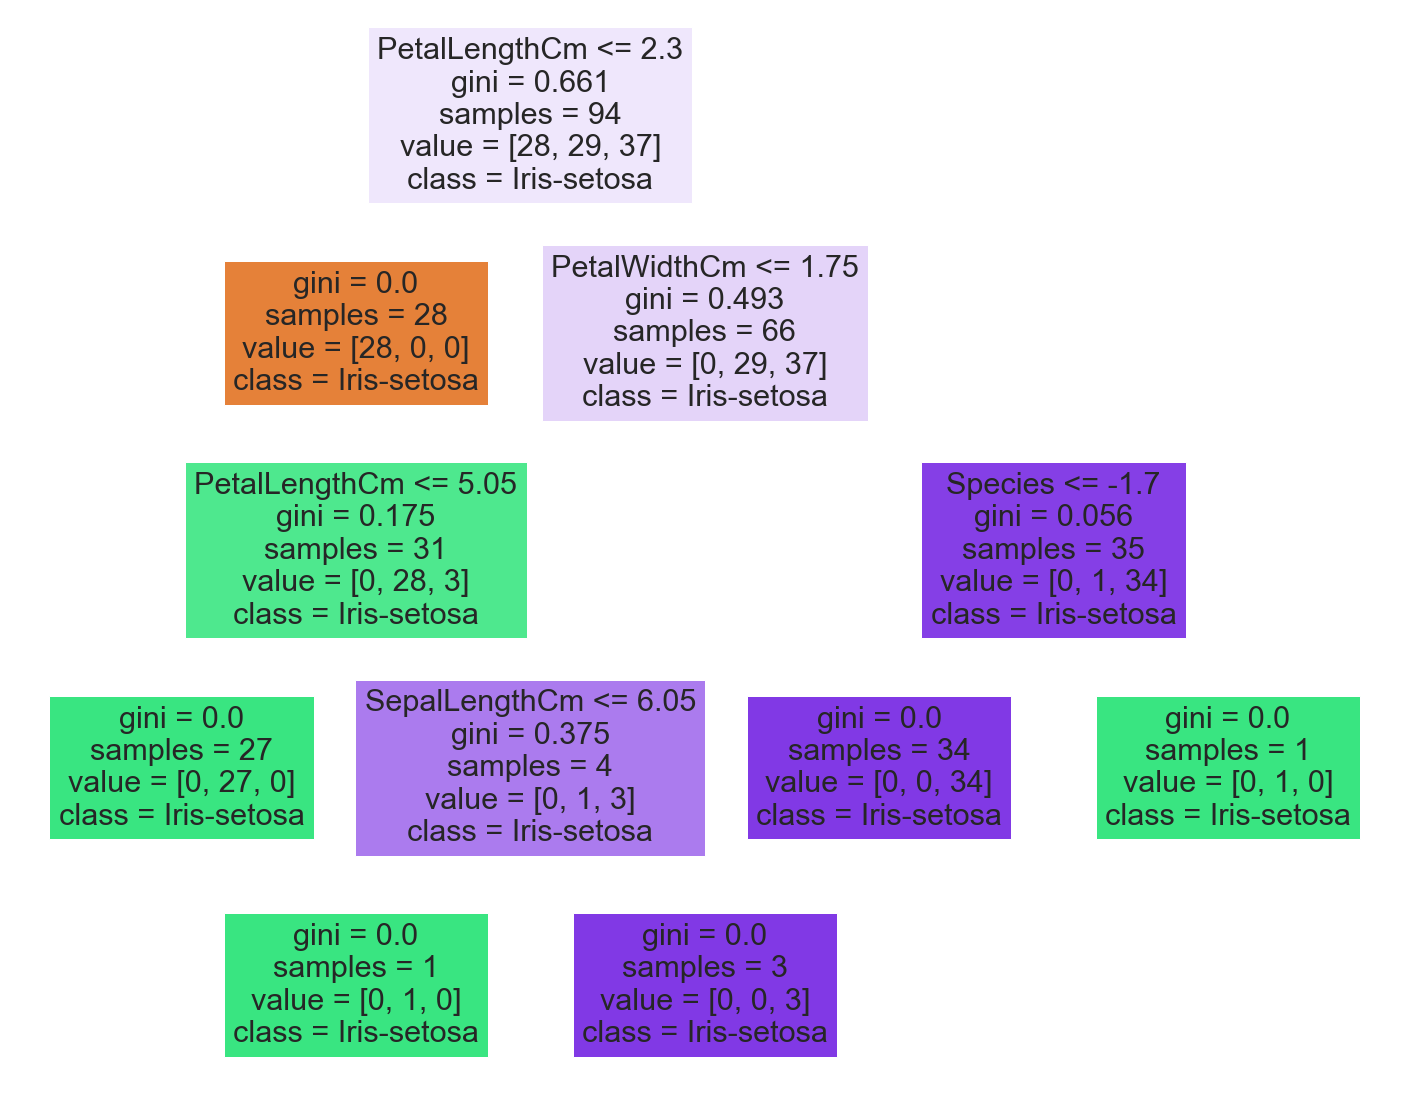

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Iris_clf, 
                   feature_names=df.columns,  
                   class_names=df.Species,
                   filled=True)

#### Accuracy

Now we can use the cross validation approach to determine the accuracy or performance score of our Decision tree. 

In [14]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9350602802215705


In [15]:
#Checking our model performance on actual unseen test data.. 

YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[28,  2],
        [ 0, 15]],

       [[34,  0],
        [ 2,  9]]], dtype=int64)

#### Testing for New points except from Dataset

In [16]:
Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_clf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']
